# Temperature Forecast Project using ML

## Problem Statement:

## Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

### important lib.s

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
temp=pd.read_csv('temper.csv')
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### Data Preprocessing

#### Checking shape of dataset:

In [3]:
temp.shape

(7752, 25)

The dataset has 7752 rows and 25 columns

#### Getting information related to datatype and null values:

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


all are in float types except Date

In [5]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

number of null values in our dataset

In [6]:
temp.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

number of unique values in our dataset

In [7]:
temp.dropna(axis=0,inplace=True)
temp.reset_index(drop=True)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7584,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7585,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7586,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


dropping null values because our target columns also contain null values

In [8]:
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

no null values after dropping

In [9]:
(temp==0).sum(axis=0)

station                0
Date                   0
Present_Tmax           0
Present_Tmin           0
LDAPS_RHmin            0
LDAPS_RHmax            0
LDAPS_Tmax_lapse       0
LDAPS_Tmin_lapse       0
LDAPS_WS               0
LDAPS_LH               0
LDAPS_CC1            104
LDAPS_CC2             93
LDAPS_CC3             75
LDAPS_CC4            135
LDAPS_PPT1          4789
LDAPS_PPT2          5094
LDAPS_PPT3          5237
LDAPS_PPT4          5690
lat                    0
lon                    0
DEM                    0
Slope                  0
Solar radiation        0
Next_Tmax              0
Next_Tmin              0
dtype: int64

number of zeros

In [10]:
temp.duplicated().sum()

0

no duplicate in datatset

In [11]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


### Feature Engineering:

In [12]:
temp[["day", "month", "year"]] = temp["Date"].str.split("-", expand = True)
temp=temp.drop('Date',axis=1)
temp.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


splitting date into day month and year

In [13]:
temp_fore=temp 

### EDA

##### importing Data visualization libraries :

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

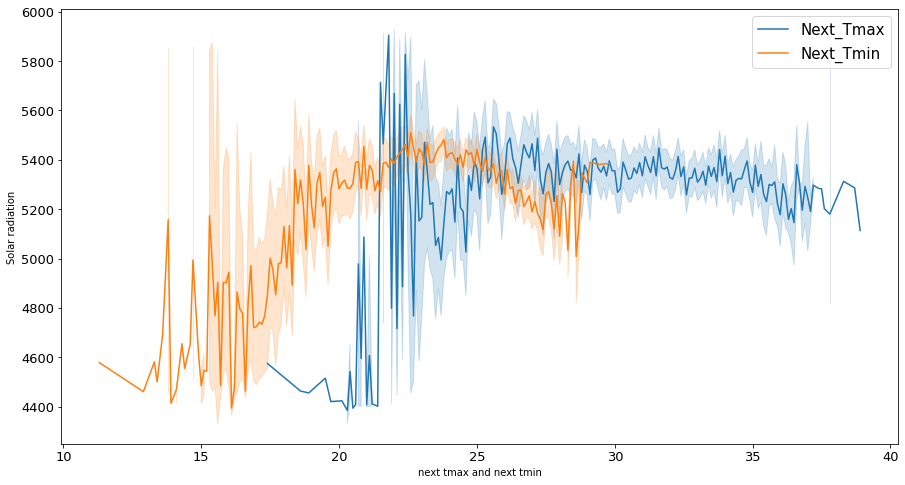

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Next_Tmax',y='Solar radiation',data=temp_fore)
sns.lineplot(x='Next_Tmin',y='Solar radiation',data=temp_fore)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('next tmax and next tmin')
plt.legend(['Next_Tmax','Next_Tmin'],fontsize=15)
plt.show()

solar radiation showing relation with target columns

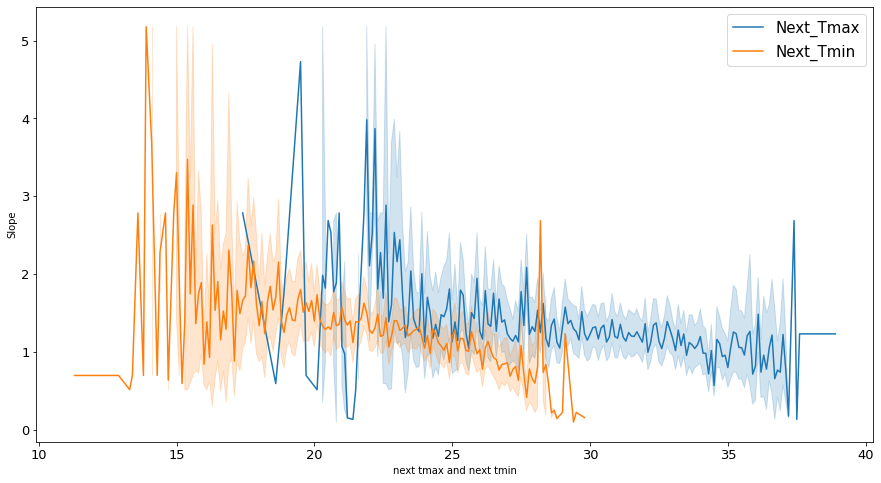

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Next_Tmax',y='Slope',data=temp_fore)
sns.lineplot(x='Next_Tmin',y='Slope',data=temp_fore)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('next tmax and next tmin')
plt.legend(['Next_Tmax','Next_Tmin'],fontsize=15)
plt.show()

slope showing relation with target columns

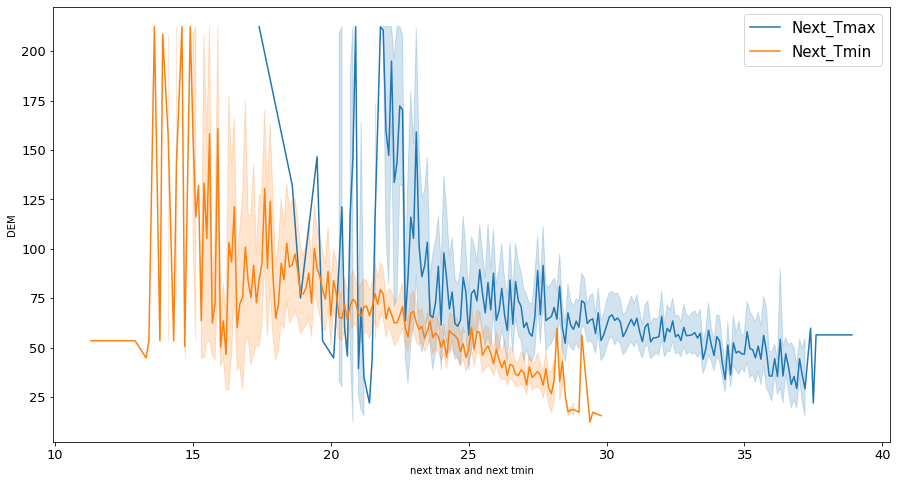

In [17]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Next_Tmax',y='DEM',data=temp_fore)
sns.lineplot(x='Next_Tmin',y='DEM',data=temp_fore)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('next tmax and next tmin')
plt.legend(['Next_Tmax','Next_Tmin'],fontsize=15)
plt.show()

DEM showing relation with target columns

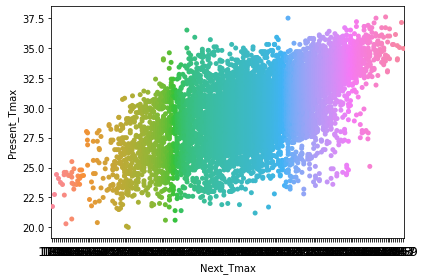

In [18]:
sns.stripplot(x=temp_fore['Next_Tmax'],y=temp_fore['Present_Tmax'])
plt.xticks(fontsize=13)
plt.tight_layout()

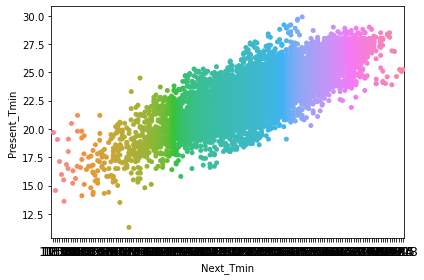

In [19]:
sns.stripplot(x=temp_fore['Next_Tmin'],y=temp_fore['Present_Tmin'])
plt.xticks(fontsize=13)
plt.tight_layout()

### heatmap correlation

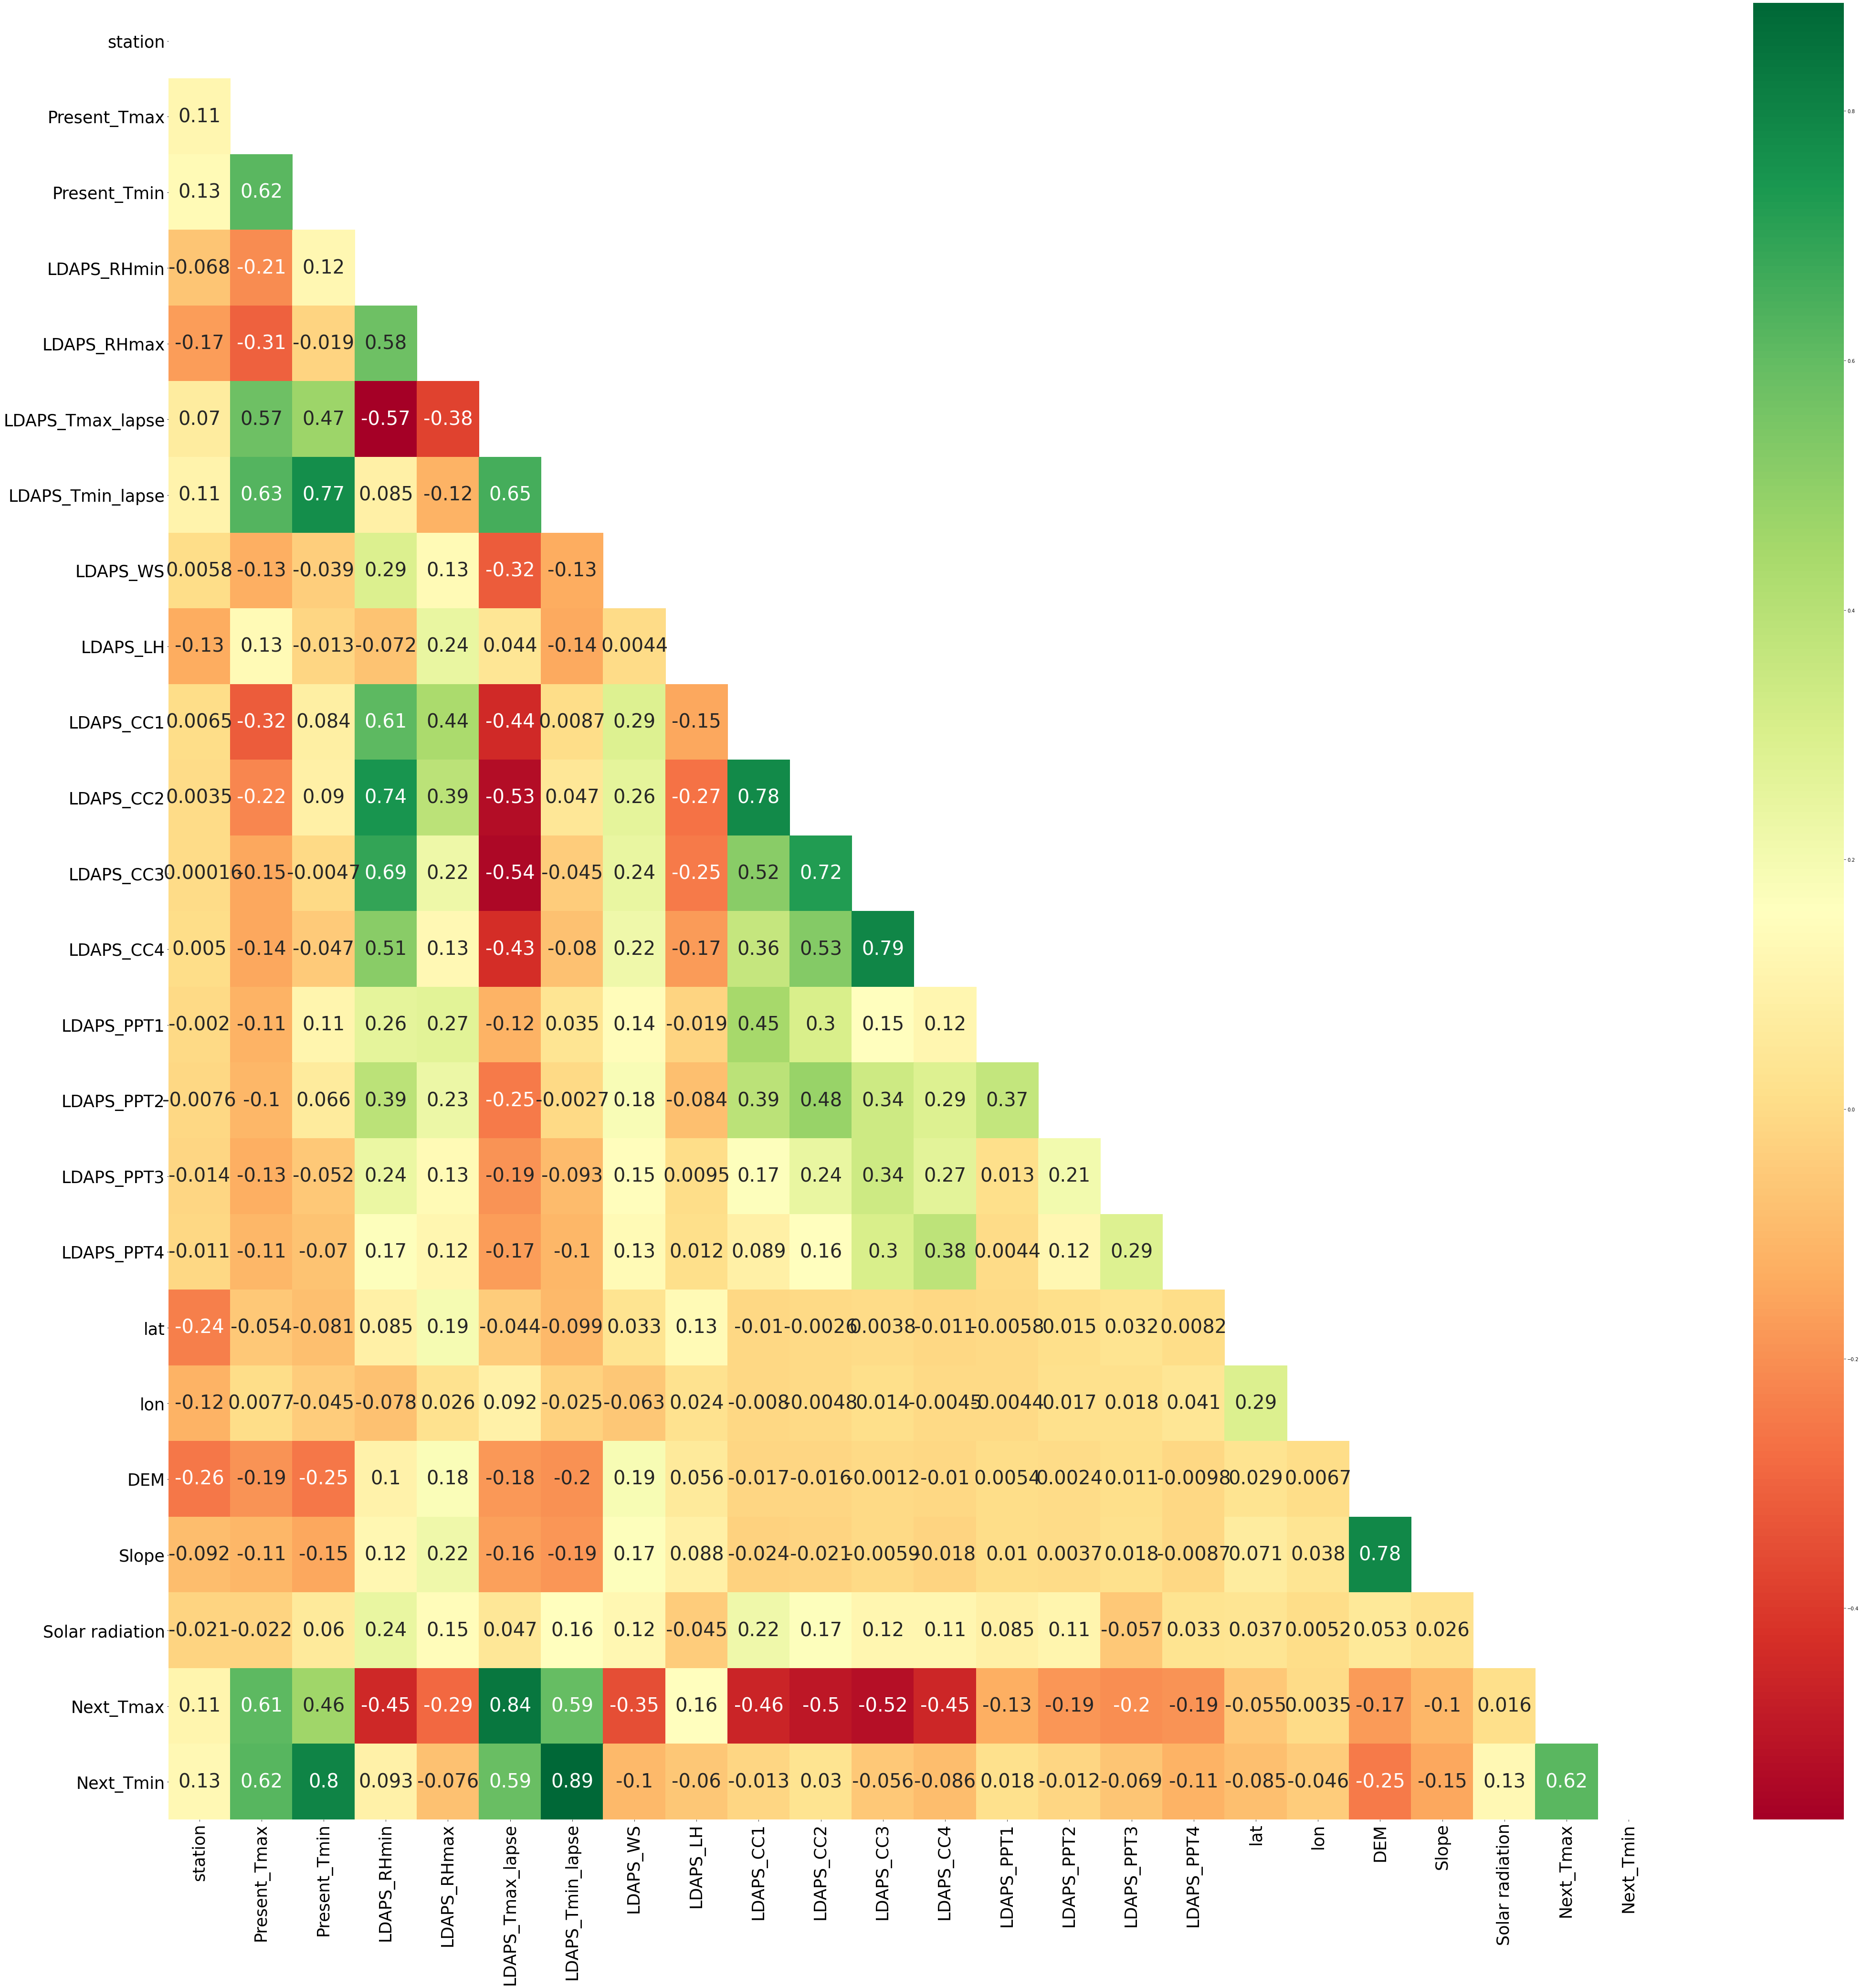

In [20]:
plt.figure(figsize=(70,70))
mask = np.triu(np.ones_like(temp_fore.corr()))
res = sns.heatmap(temp_fore.corr(),cmap='RdYlGn',annot=True,annot_kws={"size":40},mask=mask)
res.set_xticklabels(res.get_xmajorticklabels(),fontsize=35)
res.set_yticklabels(res.get_ymajorticklabels(),fontsize=35)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()

### Feature Selection

In [21]:
temp_fore=temp_fore.drop(['station','day','month','year','lat','lon'],axis=1)

dropping unnecessary columns

### visualization of outliers

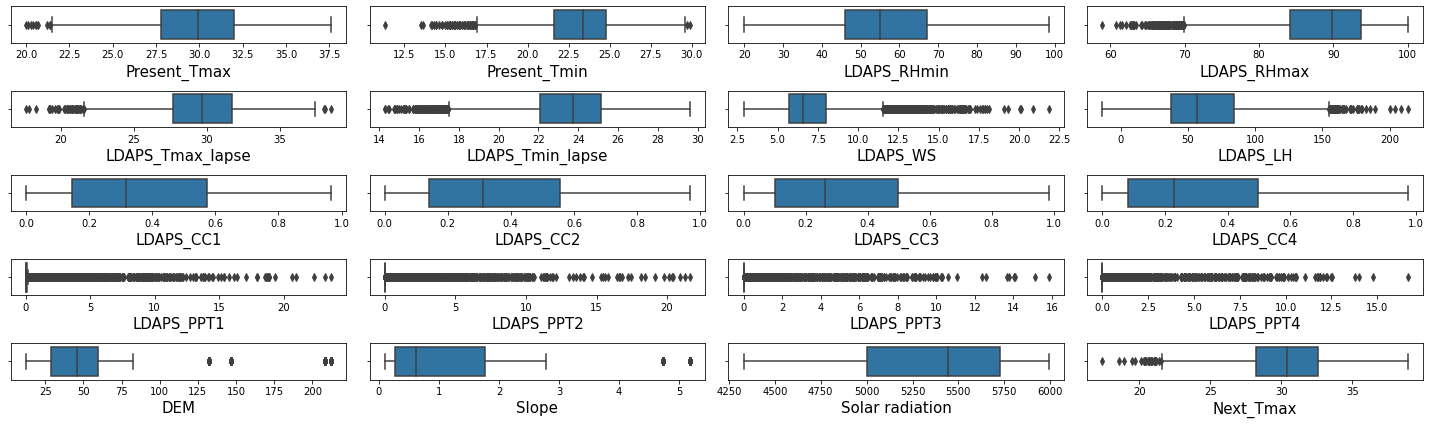

In [22]:
plt.figure(figsize=(20,6),facecolor='white')
plotnumber=1
for i in temp_fore:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(temp_fore[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

many outliers are present

### removing outliers

In [23]:
# importing zscore for outliers
from scipy.stats import zscore

def threshold():
    for i in np.arange(3,5,0.2):
        pp=temp_fore.copy()
        pp=pp[(z<i).all(axis=1)]
        loss=(temp_fore.shape[0]-pp.shape[0])/temp_fore.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

        
z=np.abs(zscore(temp_fore))
print(threshold())

With threshold 3.0 data loss is 11.19%
With threshold 3.2 data loss is 9.66%
With threshold 3.4 data loss is 8.45%
With threshold 3.6 data loss is 7.7%
With threshold 3.8 data loss is 6.96%
With threshold 4.0 data loss is 6.31%
With threshold 4.2 data loss is 5.88%
With threshold 4.4 data loss is 5.27%
With threshold 4.6 data loss is 4.82%
With threshold 4.8 data loss is 4.39%
None


In [24]:
temp_fore=temp_fore[(z<4.0).all(axis=1)]

we have selected threshold value of 4.0 . at 4.0 we loss 6.31% data

In [25]:
temp_fore.shape

(7109, 21)

final shape after removing outliers have 7109 rows and 19 columns

### visualization of skewness

In [26]:
temp_fore.skew()

Present_Tmax       -0.300800
Present_Tmin       -0.348750
LDAPS_RHmin         0.318940
LDAPS_RHmax        -0.797229
LDAPS_Tmax_lapse   -0.198535
LDAPS_Tmin_lapse   -0.559884
LDAPS_WS            1.253663
LDAPS_LH            0.623333
LDAPS_CC1           0.544109
LDAPS_CC2           0.492697
LDAPS_CC3           0.692419
LDAPS_CC4           0.700244
LDAPS_PPT1          3.892295
LDAPS_PPT2          4.648932
LDAPS_PPT3          5.628645
LDAPS_PPT4          6.087176
DEM                 1.732099
Slope               1.573312
Solar radiation    -0.526582
Next_Tmax          -0.323789
Next_Tmin          -0.389815
dtype: float64

skewness is present

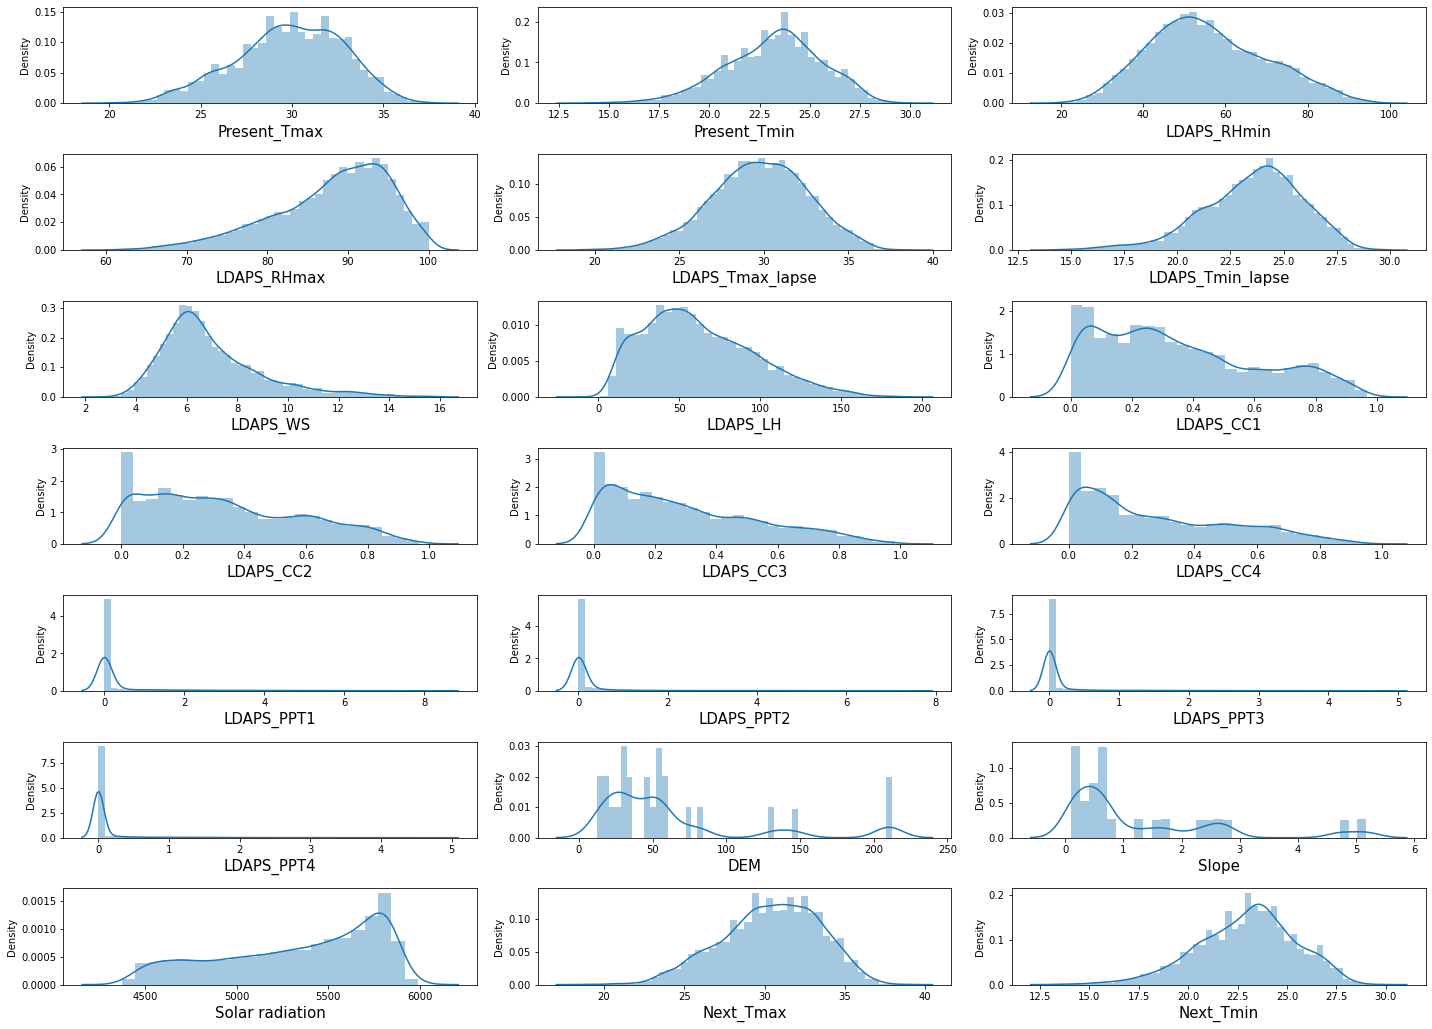

In [27]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in temp_fore:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(temp_fore[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

### power tranformation to remove skewness

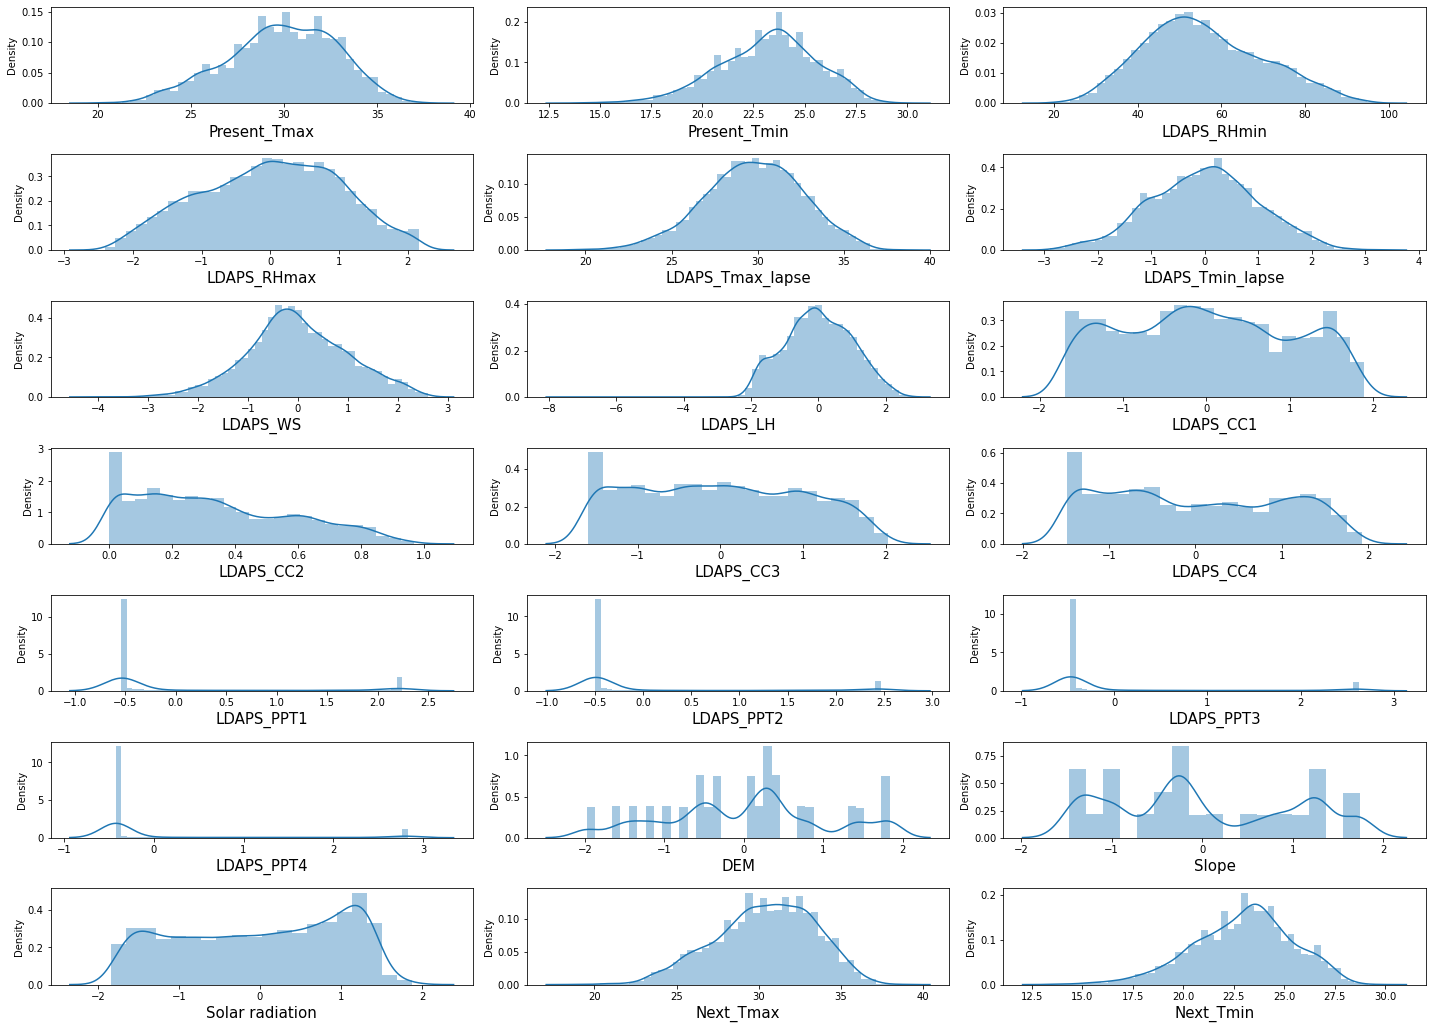

In [28]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

for i in temp_fore:
    if np.abs(temp_fore[i].skew())>0.5:
        temp_fore[i]=pt.fit_transform(temp_fore[i].values.reshape(-1,1))

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in temp_fore:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(temp_fore[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

now distribution look good

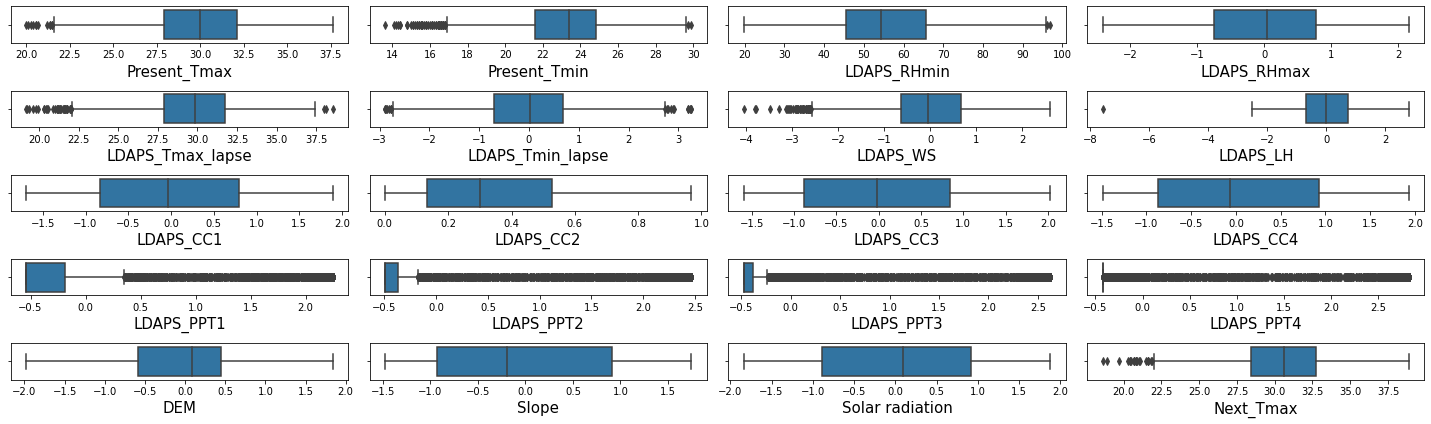

In [29]:
plt.figure(figsize=(20,6),facecolor='white')
plotnumber=1
for i in temp_fore:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(temp_fore[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

we can not remove more outliers by removing more we will loss data

### splitting x and y

In [30]:
x=temp_fore.drop(['Next_Tmax','Next_Tmin'],axis=1)
y_tmax=temp_fore['Next_Tmax']
y_tmin=temp_fore['Next_Tmin']

### standard scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

### model building with cross validation to check overfitting

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#### finding best random state for Next_Tmax target column

In [34]:
from sklearn.model_selection import train_test_split
# finding best random state
max_r2_score_tmax=0
max_tmax_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y_tmax,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_tmax=lr.predict(x_test)
    r2_tmax=r2_score(y_test,pred_tmax)
    error_tmax=mean_squared_error(y_test,pred_tmax)
    if r2_tmax>max_r2_score_tmax:
        max_r2_score_tmax=r2_tmax
        max_tmax_rs=i
print('\nmax_rs of tmax:',max_tmax_rs)


max_rs of tmax: 50


#### finding best random state for Next_Tmin target column

In [35]:
# finding best random state
max_r2_score_tmin=0
max_tmin_rs=0
for i in range(1,200):
    train_x,test_x,train_y,test_y=train_test_split(x,y_tmin,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    pred_tmin=lr.predict(test_x)
    r2_tmin=r2_score(test_y,pred_tmin)
    error_tmin=mean_squared_error(test_y,pred_tmin)
    if r2_tmin>max_r2_score_tmin:
        max_r2_score_tmin=r2_tmin
        max_tmin_rs=i
print('\nmax_rs of tmin:',max_tmin_rs)


max_rs of tmin: 49


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y_tmax,test_size=.25,random_state=max_tmax_rs) # next_tmax
train_x,test_x,train_y,test_y=train_test_split(x,y_tmin,test_size=.25,random_state=max_tmin_rs) # next_tmin

In [37]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_tmax=lr.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(lr,x,y_tmax,cv=5)
print(f"r2 score for Next_Tmax:{r2_tmax*100:.2f}")
print(f'error for Next_Tmax:{error_tmax}')
print(f'cross val score for Next_Tmax:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)

lr.fit(train_x,train_y)
pred_tmin=lr.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(lr,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)

r2 score for Next_Tmax:78.91
error for Next_Tmax:2.0440880619697874
cross val score for Next_Tmax:69.69
Difference between accuracy and cross val score 9.220655126379455

r2 score for Next_Tmin:84.33
error for Next_Tmin:0.9635364558746494
cross val score for Next_Tmin:78.11
Difference between accuracy and cross val score 6.212710834188499


In [38]:
# DecissionTree Regression
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_tmax=dtr.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(dtr,x,y_tmax,cv=5)
print(f"r2 score for Next_Tmax:{r2_tmax*100:.2f}")
print(f'error for Next_Tmax:{error_tmax}')
print(f'cross val score for Next_Tmax:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)

dtr.fit(train_x,train_y)
pred_tmin=dtr.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(dtr,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)

r2 score for Next_Tmax:76.21
error for Next_Tmax:2.3056692913385826
cross val score for Next_Tmax:42.73
Difference between accuracy and cross val score 33.48095330743751

r2 score for Next_Tmin:80.82
error for Next_Tmin:1.1790719910011251
cross val score for Next_Tmin:54.51
Difference between accuracy and cross val score 26.3105126030622


In [39]:
# KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_tmax=knr.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(knr,x,y_tmax,cv=5)
print(f"r2 score for Next_Tmax:{r2_tmax*100:.2f}")
print(f'error for Next_Tmax:{error_tmax}')
print(f'cross val score for Next_Tmax:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)

knr.fit(train_x,train_y)
pred_tmin=knr.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(knr,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)

r2 score for Next_Tmax:88.93
error for Next_Tmax:1.0728476940382452
cross val score for Next_Tmax:54.42
Difference between accuracy and cross val score 34.5143916877156

r2 score for Next_Tmin:88.69
error for Next_Tmin:0.6954168728908886
cross val score for Next_Tmin:58.80
Difference between accuracy and cross val score 29.890212494315918


In [40]:
# Support Vector Regressor
svr=SVR()
svr.fit(x_train,y_train)
pred_tmax=svr.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(svr,x,y_tmax,cv=5)
print(f"r2 score for Next_Tmax:{r2_tmax*100:.2f}")
print(f'error for Next_Tmax:{error_tmax}')
print(f'cross val score for Next_Tmax:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)

svr.fit(train_x,train_y)
pred_tmin=svr.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(svr,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)

r2 score for Next_Tmax:87.78
error for Next_Tmax:1.1848497821016588
cross val score for Next_Tmax:64.67
Difference between accuracy and cross val score 23.109492972890322

r2 score for Next_Tmin:91.02
error for Next_Tmin:0.551931141489903
cross val score for Next_Tmin:72.68
Difference between accuracy and cross val score 18.339167532908547


In [41]:
# RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_tmax=rfr.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(rfr,x,y_tmax,cv=5)
print(f"r2 score for Next_Tmax:{r2_tmax*100:.2f}")
print(f'error for Next_Tmax:{error_tmax}')
print(f'cross val score for Next_Tmax:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)

rfr.fit(train_x,train_y)
pred_tmin=rfr.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(rfr,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)

r2 score for Next_Tmax:90.37
error for Next_Tmax:0.9339296186726656
cross val score for Next_Tmax:67.82
Difference between accuracy and cross val score 22.541249818433442

r2 score for Next_Tmin:91.22
error for Next_Tmin:0.539599529808774
cross val score for Next_Tmin:77.38
Difference between accuracy and cross val score 13.844357511717106


In [42]:
# AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_tmax=abr.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(abr,x,y_tmax,cv=5)
print(f"r2 score for Next_Tmax:{r2_tmax*100:.2f}")
print(f'error for Next_Tmax:{error_tmax}')
print(f'cross val score for Next_Tmax:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)

abr.fit(train_x,train_y)
pred_tmin=abr.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(abr,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)

r2 score for Next_Tmax:77.37
error for Next_Tmax:2.1932842130546706
cross val score for Next_Tmax:66.40
Difference between accuracy and cross val score 10.978422710042807

r2 score for Next_Tmin:82.20
error for Next_Tmin:1.0944537150523312
cross val score for Next_Tmin:74.02
Difference between accuracy and cross val score 8.178557101562276


In [43]:
# GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_tmax=gbr.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(gbr,x,y_tmax,cv=5)
print(f"r2 score for Next_Tmax:{r2_tmax*100:.2f}")
print(f'error for Next_Tmax:{error_tmax}')
print(f'cross val score for Next_Tmax:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)

gbr.fit(train_x,train_y)
pred_tmin=gbr.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(gbr,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)

r2 score for Next_Tmax:85.11
error for Next_Tmax:1.4431616356614305
cross val score for Next_Tmax:70.46
Difference between accuracy and cross val score 14.65679571915203

r2 score for Next_Tmin:89.68
error for Next_Tmin:0.6341960426788608
cross val score for Next_Tmin:79.16
Difference between accuracy and cross val score 10.522447650042935


### Regularization:

In [44]:
 from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [45]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
alpha

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
pred_tmax=lasso_reg.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(lasso_reg,x,y_tmax,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmax*100:.2f}")
print(f'error for Next_Tmin:{error_tmax}')
print(f'cross val score for Next_Tmin:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)


lassocv.fit(train_x,train_y)
alpha=lassocv.alpha_
alpha

lasso_reg_=Lasso(alpha)
lasso_reg_.fit(train_x,train_y)
pred_tmin=lasso_reg_.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(lasso_reg_,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)


r2 score for Next_Tmin:78.91
error for Next_Tmin:2.0440917377133285
cross val score for Next_Tmin:69.69
Difference between accuracy and cross val score 9.219898516847081

r2 score for Next_Tmin:84.33
error for Next_Tmin:0.963529772520552
cross val score for Next_Tmin:78.12
Difference between accuracy and cross val score 6.2118147551470315


In [46]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)

alpha=ridcv.alpha_
alpha

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
pred_tmax=rid_reg.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(rid_reg,x,y_tmax,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmax*100:.2f}")
print(f'error for Next_Tmin:{error_tmax}')
print(f'cross val score for Next_Tmin:{scr_tmax.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmax*100-scr_tmax.mean()*100)


ridcv.fit(train_x,train_y)
alpha=ridcv.alpha_
alpha

rid_reg_=Ridge(alpha)
rid_reg_.fit(train_x,train_y)
pred_tmin=rid_reg_.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(rid_reg_,x,y_tmin,cv=5)
print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')
print('Difference between accuracy and cross val score',r2_tmin*100-scr_tmin.mean()*100)


r2 score for Next_Tmin:78.91
error for Next_Tmin:2.044088124576
cross val score for Next_Tmin:69.69
Difference between accuracy and cross val score 9.220652039993524

r2 score for Next_Tmin:84.33
error for Next_Tmin:0.9635364765833263
cross val score for Next_Tmin:78.11
Difference between accuracy and cross val score 6.2127093201767


### HyperParameter Tuning

######  on the basis of best least difference best model is  linear Regression

In [47]:
lr.get_params() # checking our estimator parameters for tuning

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

#### tuning for both target columns

In [48]:
from sklearn.model_selection import GridSearchCV

parameters={"copy_X":[True,False],
            "fit_intercept" : [True,False],
           "n_jobs":[1,2,3,7],
           "normalize":[True,False],
           "positive":[True,False] }
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print('best parameters',clf.best_params_)

lr_tmax=clf.best_estimator_
lr_tmax.fit(x_train,y_train)
pred_tmax=lr_tmax.predict(x_test)
r2_tmax=r2_score(y_test,pred_tmax)
error_tmax=mean_squared_error(y_test,pred_tmax)
scr_tmax=cross_val_score(lr_tmax,x,y_tmax,cv=10)
print(f"r2 score for Next_Tmin:{r2_tmax*100:.2f}")
print(f'error for Next_Tmin:{error_tmax}')
print(f'cross val score for Next_Tmin:{scr_tmax.mean()*100:.2f}')

clf=GridSearchCV(lr,parameters)
clf.fit(train_x,train_y)
print('\n\nbest parameters',clf.best_params_)

lr_tmin=clf.best_estimator_
lr_tmin.fit(train_x,train_y)
pred_tmin=lr_tmin.predict(test_x)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmin=cross_val_score(lr_tmin,x,y_tmin,cv=10)
print(f"r2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')

best parameters {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True, 'positive': False}
r2 score for Next_Tmin:78.91
error for Next_Tmin:2.0440880619697874
cross val score for Next_Tmin:65.54


best parameters {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False, 'positive': False}
r2 score for Next_Tmin:84.33
error for Next_Tmin:0.9635364558746494
cross val score for Next_Tmin:74.81


### saving best model

In [49]:
import pickle
filename='temperature_max.pkl'
pickle.dump(lr_tmax,open(filename,'wb')) 

In [50]:
import pickle
filename='temperature_min.pkl'
pickle.dump(lr_tmin,open(filename,'wb'))